<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [68]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [69]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

df = pd.read_csv('./data/job_listings.csv')
df

description_list = []

# first extract the descriptions and make as a list
for i in range(425):
    description_list.append(df['description'][i])
    # print(df['description'][i])

len(description_list) # 425 list items

# write a function to remove all the tags using BeautifulSoup
def html_to_text(text):
    soup = BeautifulSoup(text)
    return soup.get_text()
    # print()
    # print(df['description'][0])

# make a new DataFrame and overwrite the description column with data without html tags 
df_new = df.copy()
df_new['description'] = df_new['description'].apply(html_to_text)
                


In [70]:
df_new

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist
...,...,...,...
421,421,"b""About Us:\nWant to be part of a fantastic an...",Senior Data Science Engineer
422,422,"b'InternshipAt Uber, we ignite opportunity by ...",2019 PhD Data Scientist Internship - Forecasti...
423,423,"b'$200,000 - $350,000 a yearA million people a...",Data Scientist - Insurance
424,424,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...",Senior Data Scientist


In [71]:
df

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist
...,...,...,...
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist


## 2) Use Spacy to tokenize the listings 

In [72]:
df_new

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist
...,...,...,...
421,421,"b""About Us:\nWant to be part of a fantastic an...",Senior Data Science Engineer
422,422,"b'InternshipAt Uber, we ignite opportunity by ...",2019 PhD Data Scientist Internship - Forecasti...
423,423,"b'$200,000 - $350,000 a yearA million people a...",Data Scientist - Insurance
424,424,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...",Senior Data Scientist


In [73]:
import spacy
import re


# load the spacy models
nlp = spacy.load('en_core_web_md')

# nlp.disable_pipes('tagger', 'parser')
spacy_tokens = []

# run a loop for each cell of df['description'] and use in the pipe
for doc in nlp.pipe(df_new['description'], disable=['tagger', 'parser', 'ner', 'lemmatizer']):
    doc_token = []

    # each document's word is tokenized tokenized and added to the list 
    for token in doc:
        doc_token.append(token.text)
    
    # for each document tokenized put it in spacy_token list
    spacy_tokens.append(doc_token) 

df_new['spacy_token'] = spacy_tokens
    


In [74]:
df_new

,Unnamed: 0,description,title,spacy_token
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist,"[b""Job, Requirements:\nConceptual, understandi..."
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I,"[b'Job, Description\n\nAs, a, Data, Scientist,..."
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level,"[b'As, a, Data, Scientist, you, will, be, work..."
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,"[b'$4,969, -, $, 6,756, a, monthContractUnder,..."
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist,"[b'Location, :, USA, \xe2\x80\x93, multiple, l..."
...,...,...,...,...
421,421,"b""About Us:\nWant to be part of a fantastic an...",Senior Data Science Engineer,"[b""About, Us:\nWant, to, be, part, of, a, fant..."
422,422,"b'InternshipAt Uber, we ignite opportunity by ...",2019 PhD Data Scientist Internship - Forecasti...,"[b'InternshipAt, Uber, ,, we, ignite, opportun..."
423,423,"b'$200,000 - $350,000 a yearA million people a...",Data Scientist - Insurance,"[b'$200,000, -, $, 350,000, a, yearA, million,..."
424,424,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...",Senior Data Scientist,"[b""SENIOR, DATA, SCIENTIST\nJOB, DESCRIPTION\n..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [84]:
from sklearn.feature_extraction.text import CountVectorizer



# first tokenize the text so that punctions etc are removed
def tokenize(text):
    clean_text = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = clean_text.lower().split()
    return tokens

# df_new['description_tokenized'] = df_new['description'].apply(tokenize)

# Learn from the vocab
# using max_features to only have only top 20
vect = CountVectorizer(encoding='utf-8', 
                        stop_words='english', 
                        tokenizer=tokenize,
                        min_df=5,
                        max_df=0.25,
                        max_features=20
                        )

# get the sparse dtm (document term matrix) fit and transform in the same function
dtm = vect.fit_transform(df_new['description'])

# Convert the dtm into DatFrame for visibility
dtm_df = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

print(dtm_df.shape)
dtm_df.head()


(426, 20)


,applicants,applied,better,decision,deep,digital,diverse,engineers,global,growth,intelligence,internal,job,like,model,platform,position,processing,project,required
0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [85]:
df_new

,Unnamed: 0,description,title,spacy_token
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist,"[b""Job, Requirements:\nConceptual, understandi..."
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I,"[b'Job, Description\n\nAs, a, Data, Scientist,..."
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level,"[b'As, a, Data, Scientist, you, will, be, work..."
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,"[b'$4,969, -, $, 6,756, a, monthContractUnder,..."
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist,"[b'Location, :, USA, \xe2\x80\x93, multiple, l..."
...,...,...,...,...
421,421,"b""About Us:\nWant to be part of a fantastic an...",Senior Data Science Engineer,"[b""About, Us:\nWant, to, be, part, of, a, fant..."
422,422,"b'InternshipAt Uber, we ignite opportunity by ...",2019 PhD Data Scientist Internship - Forecasti...,"[b'InternshipAt, Uber, ,, we, ignite, opportun..."
423,423,"b'$200,000 - $350,000 a yearA million people a...",Data Scientist - Insurance,"[b'$200,000, -, $, 350,000, a, yearA, million,..."
424,424,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...",Senior Data Scientist,"[b""SENIOR, DATA, SCIENTIST\nJOB, DESCRIPTION\n..."


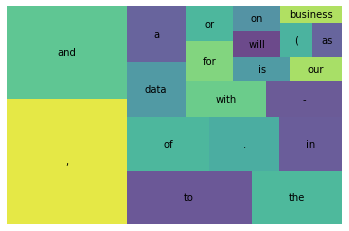

In [98]:
# visualizing using the spacy tokens as visualization from CountVectorize is not known so far

# importing the Counter module
from collections import Counter
import squarify


# importing the count function first 
def count(tokens):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()
    
    # stores the number of docs that each token appears in 
    appears_in = Counter()

    total_docs = len(tokens)

    for token in tokens:
        # stores count of every appearance of a token 
        word_counts.update(token)
        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in.update(set(token))

    # build word count dataframe
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    
    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')


# finding the count for the spacy_tokens
wc = count(df_new['spacy_token'])
wc_top20 = wc[wc['rank'] <= 20]
wc_top20

# plot
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=0.8)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer


vect = TfidfVectorizer(stop_words='english',
                       ngram_range=(1,3),
                       min_df=3,
                       max_df=0.25,
                       tokenizer=tokenize)

In [105]:
# build the vocabulary, fit transform at the same time
dtm = vect.fit_transform(df_new['description'])

# Convert to dataframe
dtm_df = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
print(dtm_df.shape)
dtm_df.head()

(426, 15237)


,0,0 2,0 2 yearsnrequirementsnxc2xbb,1,1 year,1 year experience,1 years,1 years experience,10,10 time,...,youxe2x80x99ll opportunity,youxe2x80x99ll work,youxe2x80x99ll work closely,youxe2x80x99re,youxe2x80x99re looking,youxe2x80x99re looking make,youxe2x80x99re ready,youxe2x80x99ve,youxe2x80x99ve worked,yrs
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.104846,0.064939,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [109]:
from sklearn.neighbors import NearestNeighbors

# fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_df)

# sample a doc from dtm to use as our query point
doc = dtm_df.iloc[0].values

# query using kneighbours
nn.kneighbors([doc])

(array([[0.        , 1.32442502, 1.35406024, 1.35406024, 1.35973857]]),
 array([[  0, 115, 206, 352,  42]]))

In [113]:
# the document is most similar to 115
# i.e.

print(df_new['description'][0])
print()
print(df_new['description'][115])
print()
print(df_new['description'][206])
print()
print(df_new['description'][352])
print()
print(df_new['description'][42])


b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"

b'Company Overview\nAt Proofpoint, we have a passion for protecting people, data, and brands from today\xe2\x80\x99s advanced threats and compliance risks. We hi

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 